In [121]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [122]:
df_energia_2021 = pd.read_csv("../input/energia_202109-202112.csv", encoding='latin-1')
df_energia_2022 = pd.read_csv('../input/energia_202201-202212.csv',encoding='latin-1')

In [123]:
merged_dataset = pd.concat([df_energia_2021, df_energia_2022])

In [124]:
num_entries_dataset = len(merged_dataset)
print(f"O conjunto de dados tem {num_entries_dataset} entradas.")

O conjunto de dados tem 11016 entradas.


In [125]:
print(merged_dataset.nunique())

Data                        459
Hora                         24
Normal (kWh)               1282
Horário Económico (kWh)     851
Autoconsumo (kWh)           752
Injeção na rede (kWh)         4
dtype: int64


In [126]:
print(merged_dataset.isnull().sum())

Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      7777
dtype: int64


In [127]:
merged_dataset.rename(columns={"Hora": "hora", "Normal (kWh)": "normal", "Horário Económico (kWh)": "horario", "Autoconsumo (kWh)": "autoconsumo"}, inplace=True)

<Figure size 1200x600 with 0 Axes>

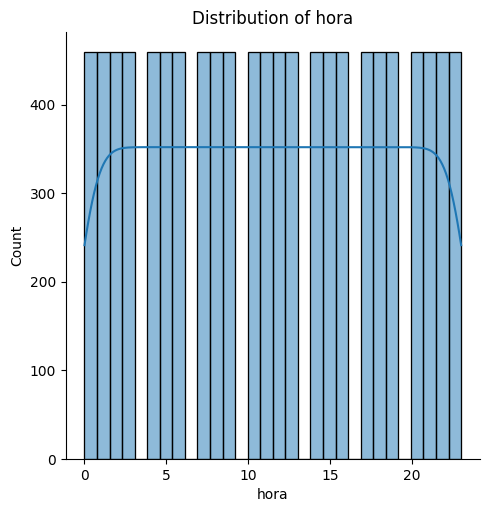

<Figure size 1200x600 with 0 Axes>

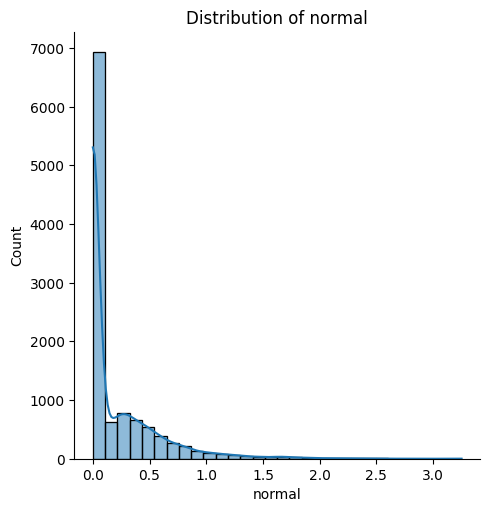

<Figure size 1200x600 with 0 Axes>

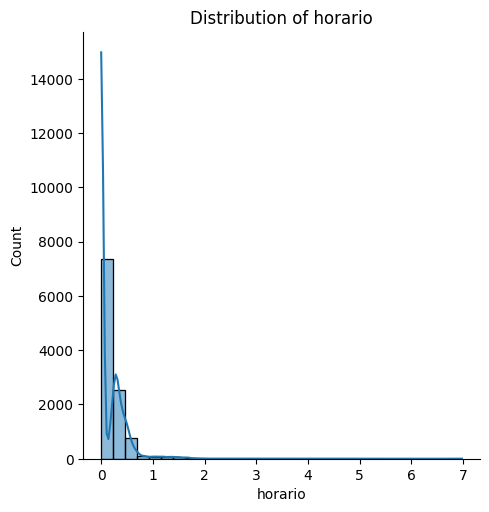

<Figure size 1200x600 with 0 Axes>

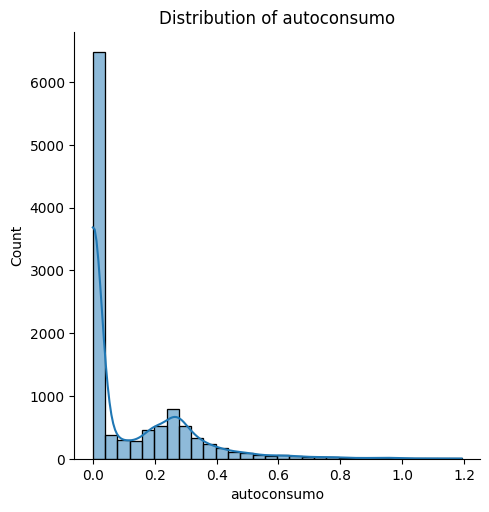

In [128]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    plt.figure(figsize=(12, 6))
    sns.displot(merged_dataset[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [129]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    print(f"{col} : {merged_dataset[col].skew()}")


hora : 0.0
normal : 2.538608357910986
horario : 3.8686342523567463
autoconsumo : 1.887919109761927


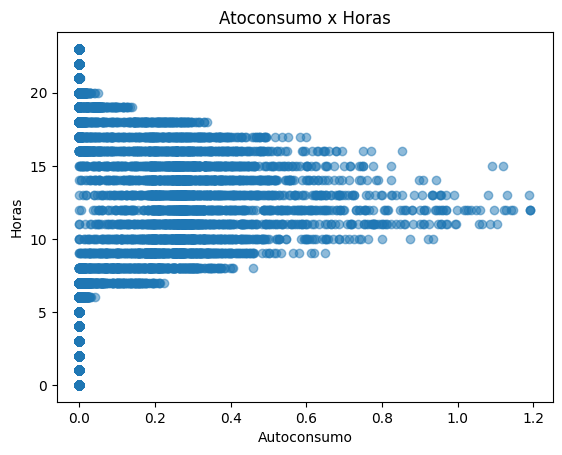

In [130]:
plt.scatter(merged_dataset['autoconsumo'], merged_dataset['hora'], alpha=0.5)

plt.xlabel('Autoconsumo')
plt.ylabel('Horas')
plt.title('Atoconsumo x Horas')

plt.show()

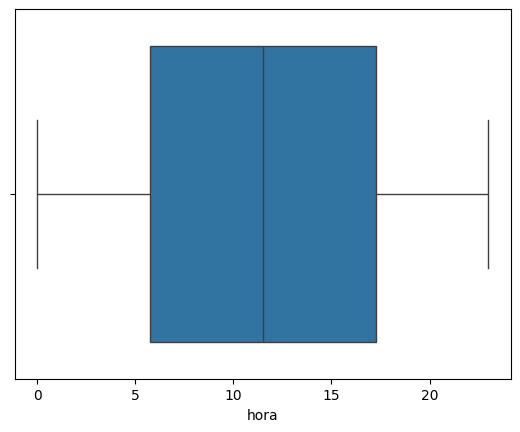

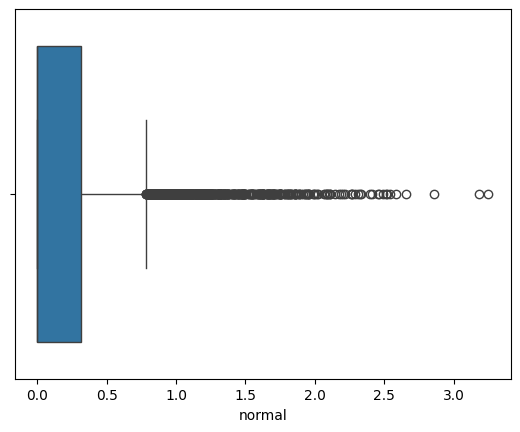

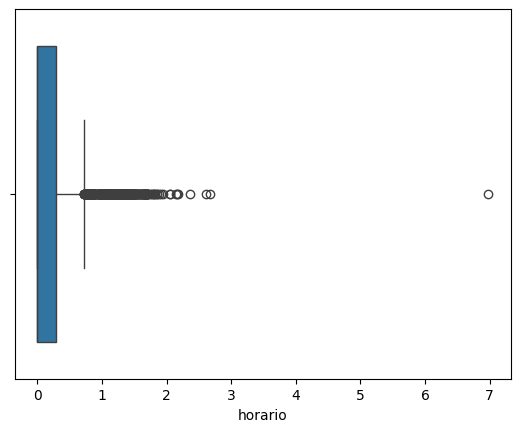

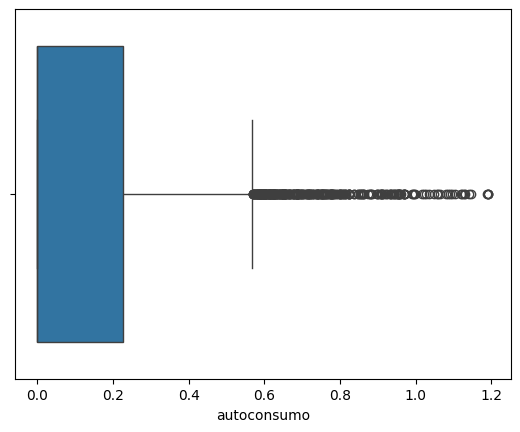

In [131]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    sns.boxplot(x=merged_dataset[col])
    plt.show()

In [132]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    z_scores = stats.zscore(merged_dataset[col])
    outliers = (z_scores > 3) | (z_scores < -3)

    outlier_values = merged_dataset[col][outliers]
    print("Valores de Outliers:", outlier_values)

Valores de Outliers: Series([], Name: hora, dtype: int64)
Valores de Outliers: 186     1.276
451     2.077
642     1.564
643     1.952
743     1.342
        ...  
8751    1.340
8753    2.101
8754    2.334
8755    1.693
8756    1.327
Name: normal, Length: 246, dtype: float64
Valores de Outliers: 967     0.977
984     1.190
991     1.134
1015    1.797
1030    1.018
        ...  
8335    1.128
8359    1.044
8455    1.332
8503    1.683
8695    1.273
Name: horario, Length: 221, dtype: float64
Valores de Outliers: 276     1.016
588     0.654
924     0.738
948     0.954
949     0.685
        ...  
7571    0.779
7572    0.910
7573    0.782
7595    0.860
8027    0.848
Name: autoconsumo, Length: 206, dtype: float64


In [133]:
merged_dataset = merged_dataset[~outliers]

In [134]:
num_entries_dataset = len(merged_dataset)
print(f"O conjunto de dados tem {num_entries_dataset} entradas.")


O conjunto de dados tem 10810 entradas.


In [135]:
scaler = StandardScaler()

# Normalização z-scalling porque hora tem dist. normal

merged_dataset['hora_normalized'] = scaler.fit_transform(merged_dataset['hora'].values.reshape(-1, 1)).flatten()


In [136]:
cols = ['normal', 'horario', 'autoconsumo']

for col in cols:
    atributo_values = merged_dataset[col].values.reshape(-1, 1) 

    scaler = MinMaxScaler()

    merged_dataset[col + '_normalized'] = scaler.fit_transform(atributo_values)

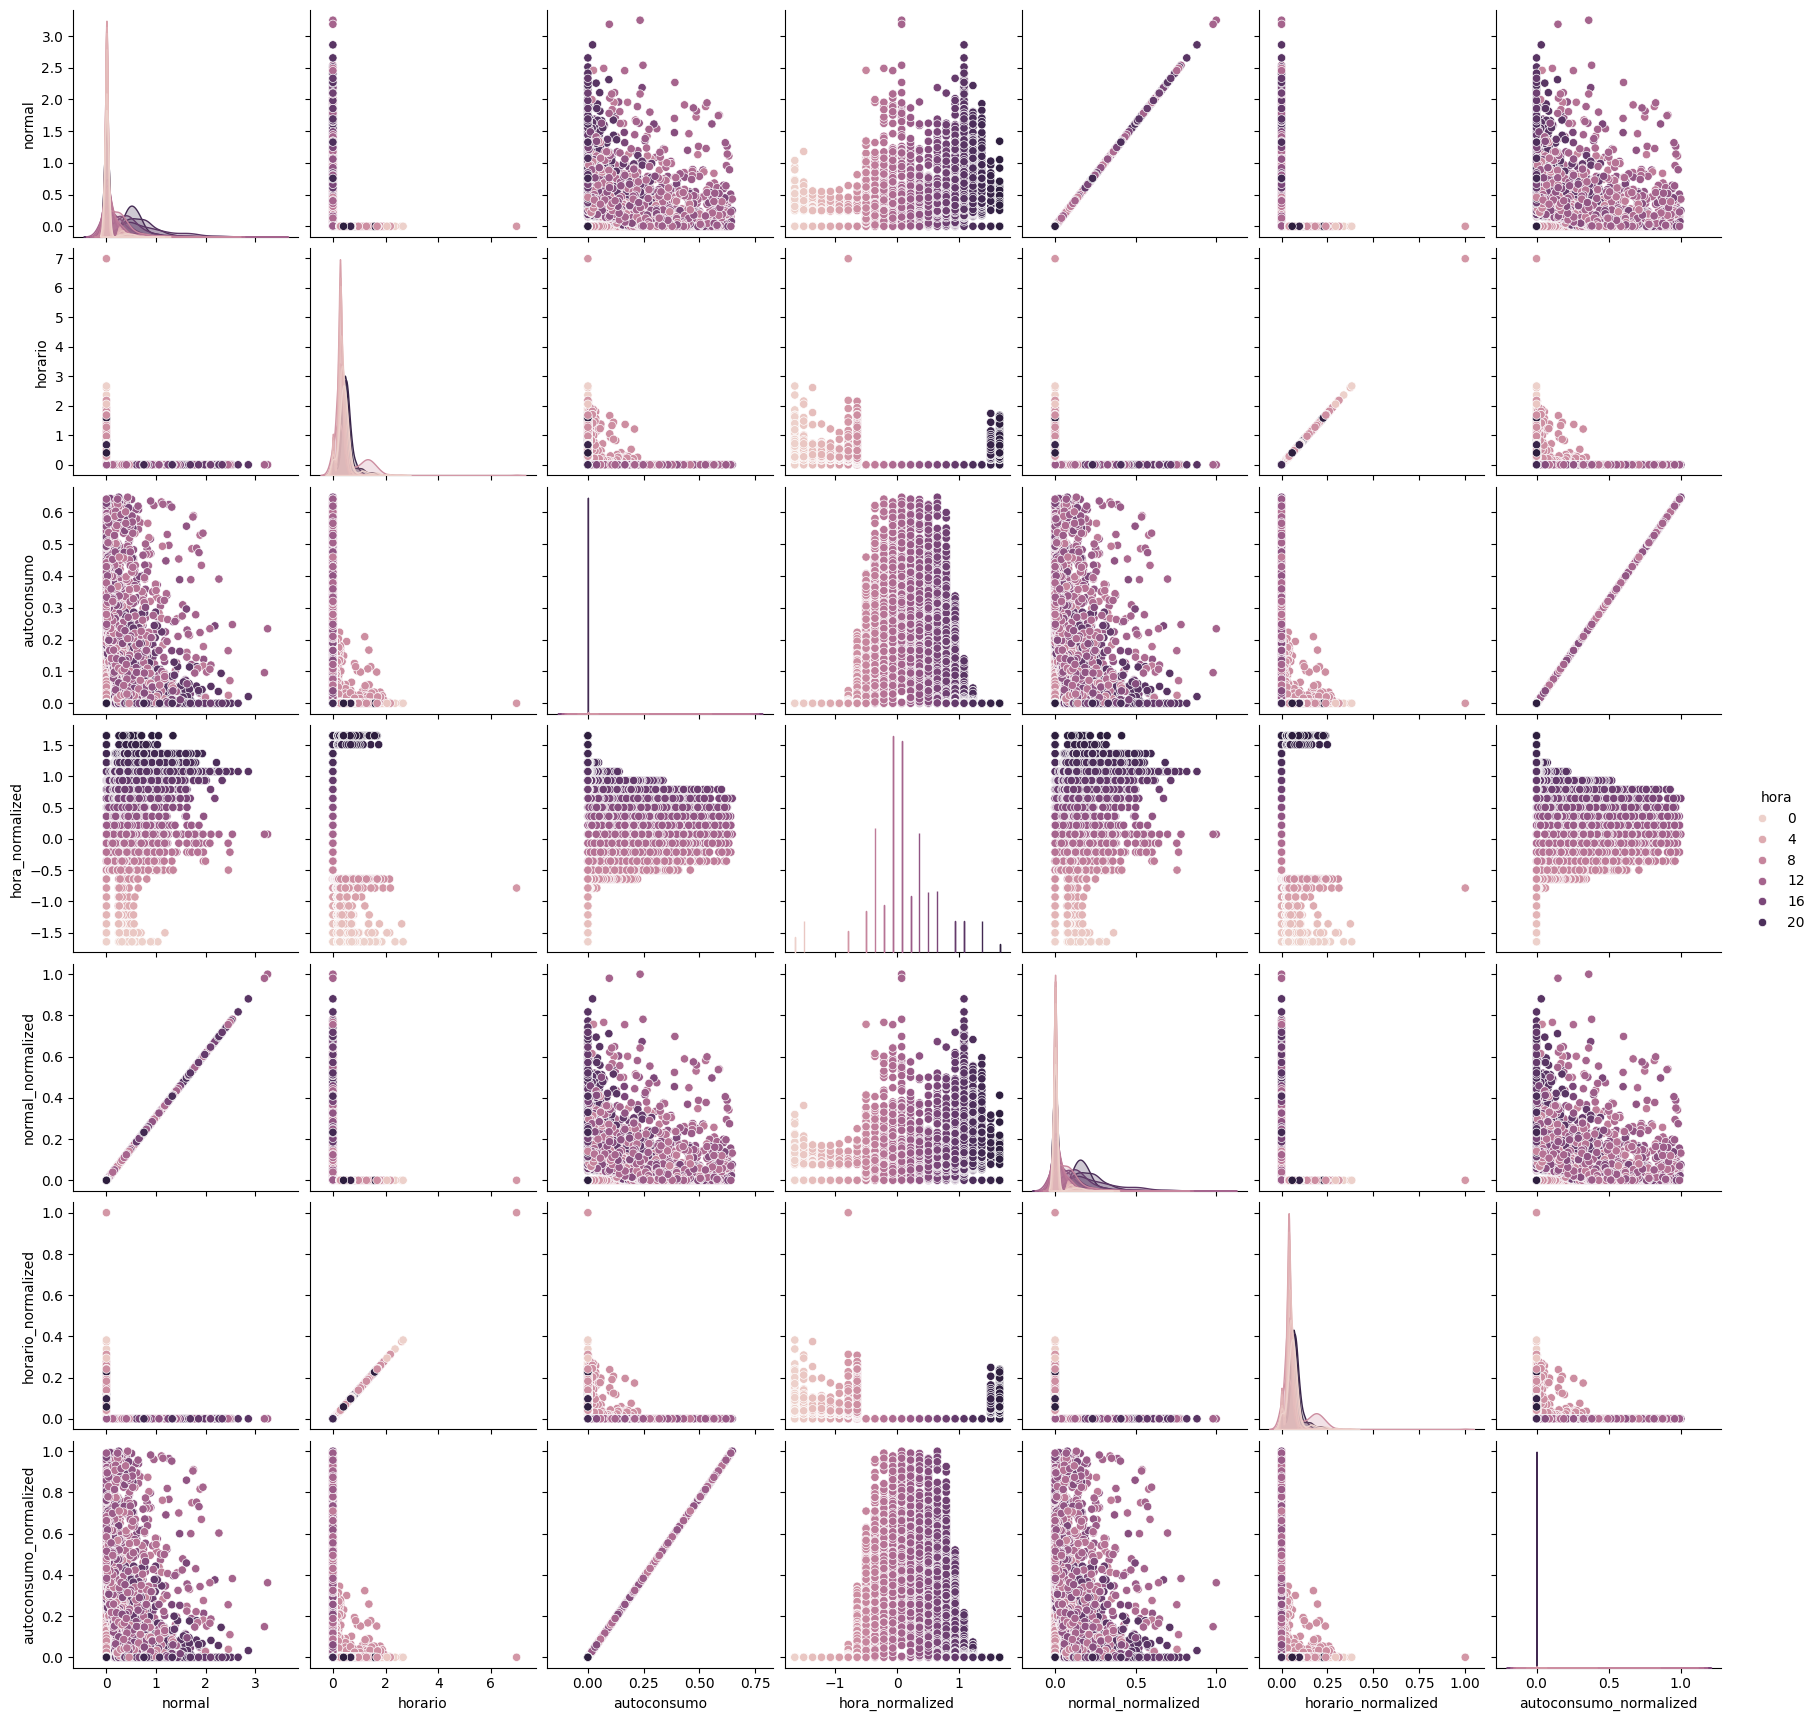

In [137]:
sns.pairplot(merged_dataset, hue='hora')
plt.show()

In [138]:
print(merged_dataset)

            Data  hora  normal  horario  autoconsumo Injeção na rede (kWh)  \
0     2021-09-29     0   0.000    0.000          0.0                   NaN   
1     2021-09-29     1   0.000    0.000          0.0                   NaN   
2     2021-09-29     2   0.000    0.000          0.0                   NaN   
3     2021-09-29     3   0.000    0.000          0.0                   NaN   
4     2021-09-29     4   0.000    0.000          0.0                   NaN   
...          ...   ...     ...      ...          ...                   ...   
8755  2022-12-31    19   1.693    0.000          0.0                   NaN   
8756  2022-12-31    20   1.327    0.000          0.0                   NaN   
8757  2022-12-31    21   0.757    0.000          0.0                   NaN   
8758  2022-12-31    22   0.000    0.675          0.0                   NaN   
8759  2022-12-31    23   0.000    0.403          0.0                   NaN   

      hora_normalized  normal_normalized  horario_normalized  \

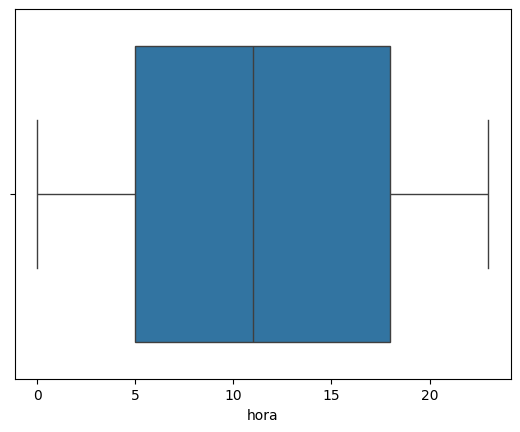

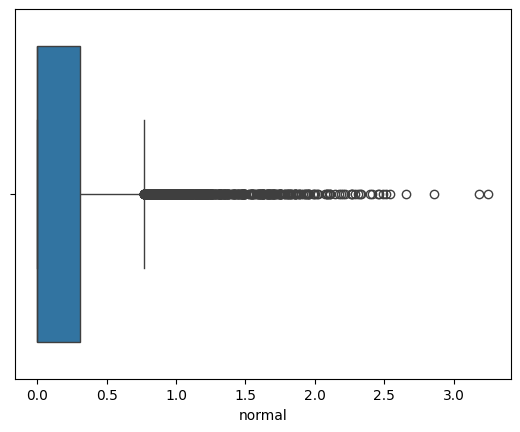

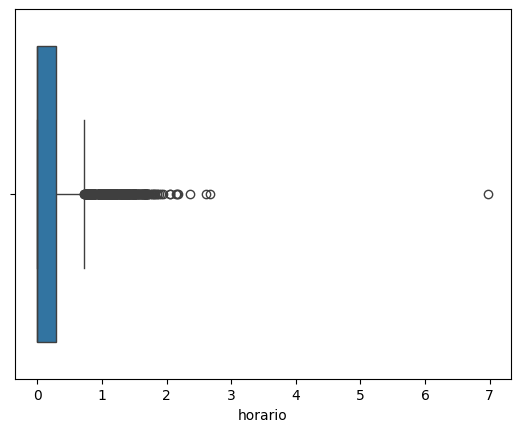

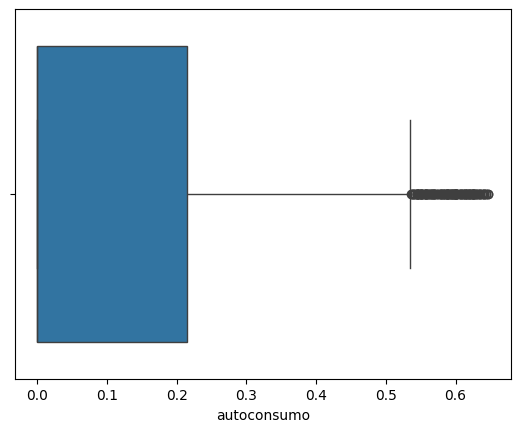

In [139]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    sns.boxplot(x=merged_dataset[col])
    plt.show()

Como podemos ver, ainda continuamos com alguns outliers que vamos optar não remover, pois podem ser verdadeiros no contexto do problema.

In [140]:
print(merged_dataset.head())

         Data  hora  normal  horario  autoconsumo Injeção na rede (kWh)  \
0  2021-09-29     0     0.0      0.0          0.0                   NaN   
1  2021-09-29     1     0.0      0.0          0.0                   NaN   
2  2021-09-29     2     0.0      0.0          0.0                   NaN   
3  2021-09-29     3     0.0      0.0          0.0                   NaN   
4  2021-09-29     4     0.0      0.0          0.0                   NaN   

   hora_normalized  normal_normalized  horario_normalized  \
0        -1.644514                0.0                 0.0   
1        -1.501327                0.0                 0.0   
2        -1.358139                0.0                 0.0   
3        -1.214951                0.0                 0.0   
4        -1.071763                0.0                 0.0   

   autoconsumo_normalized  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
